## Test

## DFT

Importing important libarys and implementing DFT function 

In [26]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

#DFT 
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

# .wav-file

Importing .wav-file and printing length of the vector and sample rate

Vector containing air pressure differences at different (discrete) time steps
Sample rate says how many samples per second the .wav-file contains (normally 44100)

In [36]:

sample_rate, wav_data = wavfile.read('Pistole1.wav')
print(len(wav_data))
print(wav_data)
print(sample_rate)


16960
[[-11520      0]
 [-11776      0]
 [-11776      0]
 ...
 [     0      0]
 [     0      0]
 [  -256      0]]
44100


/var/folders/bc/915hg_gd3k57dw1g753wc4vr0000gn/T/ipykernel_19033/1619410136.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, wav_data = wavfile.read('Pistole1.wav')


# Fourier transformation

performing DFT on wav-Vector. 
dft_result contains "frequencies" ( = periodic functions with given frequency) and quantity of frequence in measured signal

In [28]:
dft_result = np.fft.fft(wav_data)
print(dft_result)

[[ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 ...
 [-4.+0.j  0.+0.j]
 [ 2.+0.j -2.+0.j]
 [ 0.+0.j  4.+0.j]]


# Frequenzen für die x-Achse

Determining occuring frequencies

Frage: Was genau macht fftfreq? 

In [29]:
n = len(wav_data)
print(n) 
freqs = np.fft.fftfreq(n)
print(freqs) 

262094
[ 0.0000000e+00  3.8154250e-06  7.6308500e-06 ... -1.1446275e-05
 -7.6308500e-06 -3.8154250e-06]


# Plot

Creating plot with amplitude of frequencies

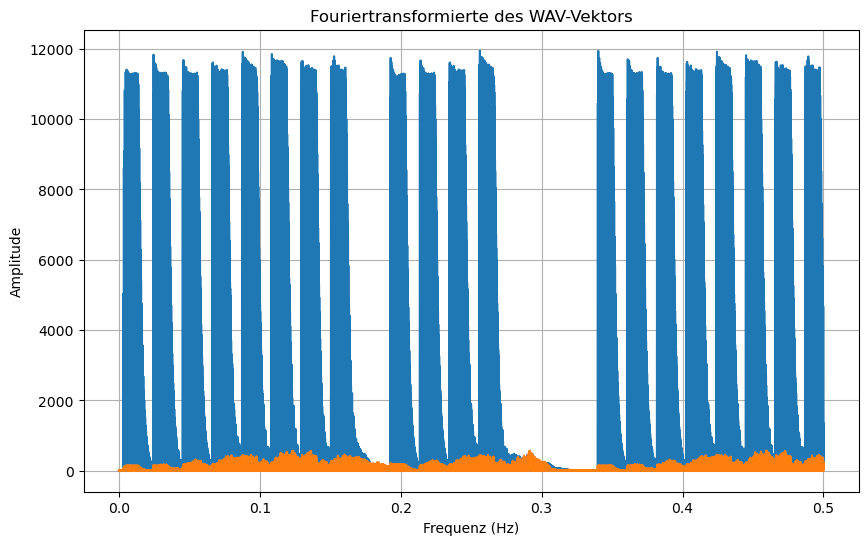

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(freqs[:n//2], np.abs(dft_result)[:n//2])  # Nur die positive Frequenzhälfte
plt.title('Fouriertransformierte des WAV-Vektors')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Inverse DFT


In [31]:
#IDFT
def idft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return (1/N)*X

In [32]:
idft_result = np.fft.ifft(dft_result)
len(idft_result)
idft_result

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j],
       ...,
       [-2.+0.j, -2.+0.j],
       [ 0.+0.j,  2.+0.j],
       [ 2.+0.j, -2.+0.j]])

# Delete Rounding Errors 

In [33]:
idft_rounded = np.around(idft_result, 7) #6 -> ok, 7 -> not ok

if np.array_equal(wav_data, idft_rounded):
    print("ok")
else:
    print("not ok")

ok


# Create Wav Output

In [34]:
samples = wav_data
fs = 44100
out_f = 'output.wav'

wavfile.write(out_f, fs, samples)